In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error

In [2]:
turb_1 = pd.read_csv('../data/FRSSO18.csv',sep=';',decimal=',',parse_dates=['DateTime'],dayfirst=True)

In [3]:
turb_1.head(3)

,DateTime,ActivePower,ProductionForecast_D,ProductionForecast_M
0,2020-03-05 00:00:00,1614.345422,948.189357,745.2
1,2020-03-05 01:00:00,1478.355419,967.269962,711.8
2,2020-03-05 02:00:00,1690.147069,948.830677,645.0


Netoyage des données

In [4]:
turb_1 = turb_1[turb_1.ActivePower != 0]
turb_1 = turb_1[turb_1.ProductionForecast_D != 0]
turb_1 = turb_1[turb_1.ProductionForecast_M != 0]

In [35]:
turb_1['naive_expert'] = (turb_1['ProductionForecast_D'] + turb_1['ProductionForecast_M'])/2

In [37]:
Y_true = turb_1['ActivePower'].to_numpy()
Naive_expert = turb_1['naive_expert'].to_numpy()

In [39]:
mae_Naive = mean_absolute_error(Y_true, Naive_expert)
print(mae_Naive)

227.31510716545785


Calcul des erreurs

In [5]:
turb_1['error_expert1'] = abs(turb_1['ActivePower'] - turb_1['ProductionForecast_D'])/turb_1['ActivePower']

In [6]:
turb_1['error_expert2'] = abs(turb_1['ActivePower'] - turb_1['ProductionForecast_M'])/turb_1['ActivePower']

In [7]:
turb_1['min_error'] = turb_1[['error_expert1','error_expert2']].min(axis=1)

Initialisation du poids des vecteurs

In [8]:
turb_1.loc[turb_1.index[0], 'weight_expert1'] = 1 / \
    (1 + (turb_1.loc[turb_1.index[0], 'error_expert1'] /
     turb_1.loc[turb_1.index[0], 'error_expert2']))

turb_1.loc[turb_1.index[0], 'weight_expert2'] = 1 - \
    turb_1.loc[turb_1.index[0], 'weight_expert1']

Incrémentation des poids des erreurs

In [9]:
for k in range(1, len(turb_1)):
    
    turb_1.loc[turb_1.index[k], 'weight_expert1'] = (
        turb_1.loc[turb_1.index[k-1], 'weight_expert1'] + 1 /
            (1 + (turb_1.loc[turb_1.index[k], 'error_expert1'] /
             turb_1.loc[turb_1.index[k], 'error_expert2'])))
    
    turb_1.loc[turb_1.index[k], 'weight_expert2']=(
        turb_1.loc[turb_1.index[k-1], 'weight_expert1'] + 1 /
            (1 + (turb_1.loc[turb_1.index[k], 'error_expert2'] /
             turb_1.loc[turb_1.index[k], 'error_expert1'])))
    
turb_1['sum_weights']=turb_1['weight_expert1'] + turb_1['weight_expert2']

Aggrégation du poids des experts en fonction de leur poids

In [10]:
turb_1['new_expert'] = (turb_1['ProductionForecast_D']*turb_1['weight_expert1'] +
                        turb_1['ProductionForecast_M']*turb_1['weight_expert2'])/turb_1['sum_weights']

In [36]:
turb_1.head(50)

,DateTime,ActivePower,ProductionForecast_D,ProductionForecast_M,error_expert1,error_expert2,min_error,weight_expert1,weight_expert2,sum_weights,new_expert,naive_expert
0,2020-03-05 00:00:00,1614.345422,948.189357,745.2,0.412648,0.538389,0.412648,0.566107,0.433893,1.000000,860.113762,846.694678
1,2020-03-05 01:00:00,1478.355419,967.269962,711.8,0.345712,0.518519,0.345712,1.166085,0.966130,2.132215,851.513689,839.534981
2,2020-03-05 02:00:00,1690.147069,948.830677,645.0,0.438611,0.618376,0.438611,1.751121,1.581048,3.332169,804.669094,796.915338
3,2020-03-05 03:00:00,1516.965994,1102.870568,645.0,0.272976,0.574809,0.272976,2.429134,2.073109,4.502243,892.038879,873.935284
4,2020-03-05 04:00:00,936.617865,962.811666,568.8,0.027966,0.392709,0.027966,3.362654,2.495614,5.858268,794.963260,765.805833
5,2020-03-05 05:00:00,1052.511157,674.923392,568.8,0.358749,0.459578,0.358749,3.924261,3.801048,7.725309,622.707992,621.861696
6,2020-03-05 06:00:00,1465.864993,1018.671511,594.2,0.305071,0.594642,0.305071,4.585185,4.263337,8.848522,814.155415,806.435755
7,2020-03-05 07:00:00,1392.282661,967.602407,594.2,0.305024,0.573219,0.305024,5.237873,4.932497,10.170370,786.507102,780.901203
8,2020-03-05 08:00:00,848.415479,739.685591,745.2,0.128156,0.121657,0.121657,5.724864,5.750882,11.475746,742.449047,742.442795
9,2020-03-05 09:00:00,1164.875181,1661.740461,1018.6,0.426540,0.125572,0.125572,5.952303,6.497425,12.449728,1326.089999,1340.170231


Calcul des mean absolute error

In [11]:
ProductionForecast_D = turb_1['ProductionForecast_D'].to_numpy()
ProductionForecast_M = turb_1['ProductionForecast_M'].to_numpy()
New_expert = turb_1['new_expert'].to_numpy()
Y_true = turb_1['ActivePower'].to_numpy()

In [12]:
mae_D = mean_absolute_error(Y_true, ProductionForecast_D)
mae_M = mean_absolute_error(Y_true, ProductionForecast_M)
mae_New = mean_absolute_error(Y_true, New_expert)

In [40]:
d = {'mae_D': [mae_D], 'mae_M': [mae_M], 'mae_New': [mae_New], 'mae_Naive': [mae_Naive]}
df = pd.DataFrame(data=d)
df

,mae_D,mae_M,mae_New,mae_Naive
0,245.464623,237.088207,227.282785,227.315107


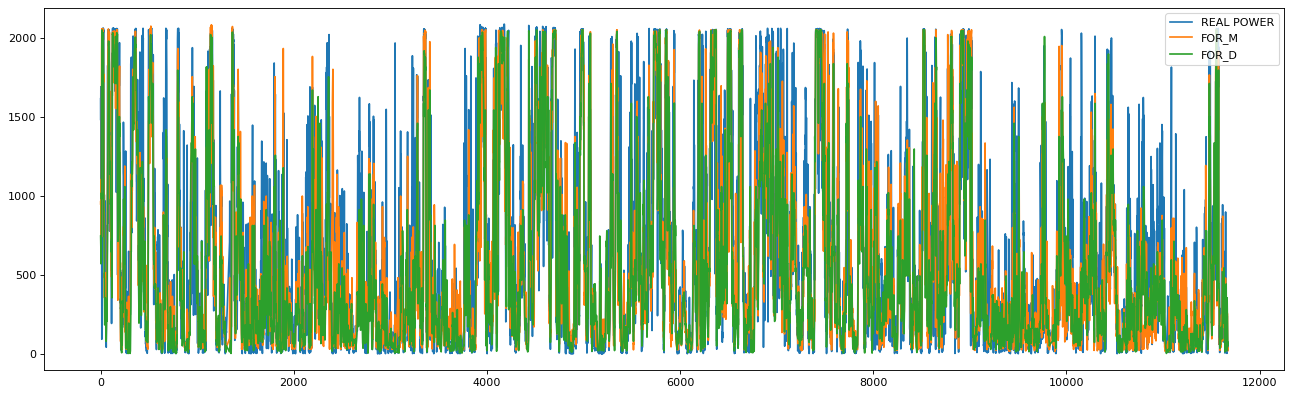

In [41]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

plt.plot(turb_1['ActivePower'],label='REAL POWER')
plt.plot(turb_1['ProductionForecast_D'],label='FOR_M')
plt.plot(turb_1['ProductionForecast_M'],label='FOR_D')
#plt.plot(turb_1['new_expert'],label='FOR_MD')
plt.legend();

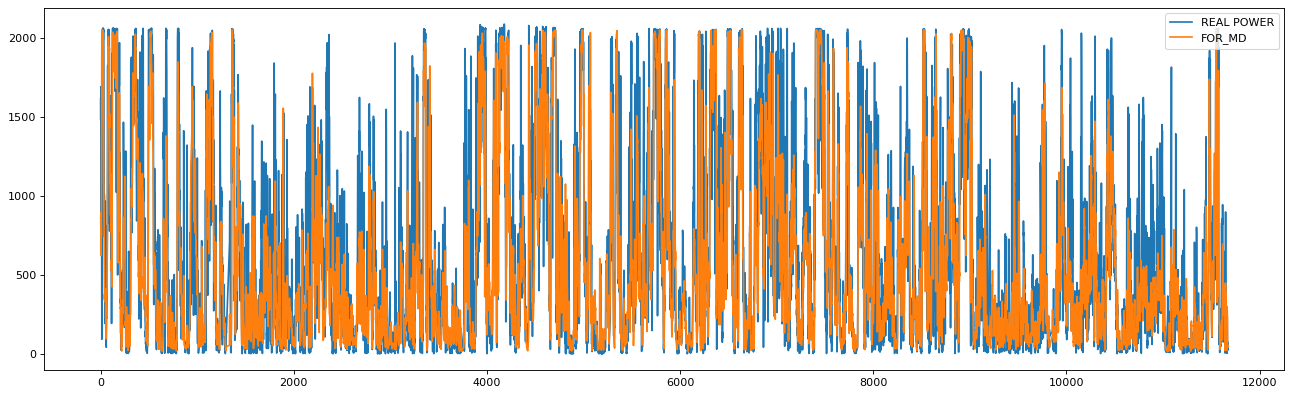

In [29]:
figure(figsize=(20, 6), dpi=80)

plt.plot(turb_1['ActivePower'],label='REAL POWER')
plt.plot(turb_1['new_expert'],label='FOR_MD')
plt.legend();